In [3]:
import numpy as np
import matplotlib.pyplot as plt # Для 5-го задания
from scipy.spatial import distance # Для 7-го задания

### **1. Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.**

Начальные данные

In [4]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
X_1 = np.random.randint(0, 20, size = (300, 400))
X_2 = np.random.randint(0, 20, size = (30000, 40000))

1.1. Векторизация

In [5]:
def task_1_vec(X):
  return np.prod(np.diag(X)[np.diag(X) != 0])

In [6]:
%timeit -n 1000 task_1_vec(X)

1000 loops, best of 5: 11.5 µs per loop


In [7]:
%timeit -n 1000 task_1_vec(X_1)

1000 loops, best of 5: 13 µs per loop


In [8]:
%timeit -n 1000 task_1_vec(X_2)

1000 loops, best of 5: 756 µs per loop


1.2. Циклы

In [9]:
def task_1_cycle(X):
  prod = 1
  range_size = np.shape(X)[0] - 1
  for i in range(range_size):
    if X[i][i] != 0:
      prod *= X[i][i]
  return prod

In [10]:
%timeit -n 1000 task_1_cycle(X)

1000 loops, best of 5: 3.2 µs per loop


In [11]:
%timeit -n 1000 task_1_cycle(X_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


1000 loops, best of 5: 262 µs per loop


In [12]:
%timeit -n 1000 task_1_cycle(X_2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in long_scalars
  


1000 loops, best of 5: 24.6 ms per loop


1.3. Свой вариант

In [13]:
def task_1_my(X):
  return np.prod(np.where(np.diag(X) != 0, np.diag(X), 1))

In [14]:
%timeit -n 1000 task_1_my(X)

1000 loops, best of 5: 12.9 µs per loop


In [15]:
%timeit -n 1000 task_1_my(X_1)

1000 loops, best of 5: 14.9 µs per loop


In [16]:
%timeit -n 1000 task_1_my(X_2)

1000 loops, best of 5: 735 µs per loop


Проверка работоспособности

In [17]:
task_1_vec(X), task_1_cycle(X), task_1_my(X)

(3, 3, 3)

In [18]:
del X, X_1, X_2

**Вывод:** Для размера массива первого порядка, вариант с циклами получился быстрее, но это только частный случай. Из полученных результатов, очевидно, вытекает, что с ростом размера массива, вариант реализации программы с циклами растет значительно быстрее, чем векторизованный вариант. Циклы - зло.
Собственный вариант был реализован аналогично первому, но с небольшим изменением (для размера массива 5-го порядка, получается немного быстрее).

### **2. Дана матрица X и два вектора одинаковой длины i и j. Построить вектор np.array([X[i[0], j[0]], X[i[1], j[1]], ... , X[i[N-1], j[N-1]]]).**

Начальные данные

In [19]:
def initial(size_ij):
  max_element_X = 9
  i = np.array([np.random.randint(0,size_ij-1) for indx in range(size_ij)])
  j = np.array([np.random.randint(0,size_ij-1) for indx in range(size_ij)])
  X = np.array([[np.random.randint(0,max_element_X) for indx in range(size_ij)] for jndx in range(size_ij)])
  return i, j, X

In [20]:
i_1, j_1, X_1 = initial(10)
i_2, j_2, X_2 = initial(100)
i_3, j_3, X_3 = initial(1000)

2.1. Векторизация

In [21]:
def task_2_vec(i, j, X):
  return X[i,j]

In [22]:
%timeit -n 1000 task_2_vec(i_1, j_1, X_1)

1000 loops, best of 5: 1.32 µs per loop


In [23]:
%timeit -n 1000 task_2_vec(i_2, j_2, X_2)

1000 loops, best of 5: 1.83 µs per loop


In [24]:
%timeit -n 1000 task_2_vec(i_3, j_3, X_3)

1000 loops, best of 5: 7.98 µs per loop


2.2. Циклы

In [25]:
def task_2_cycle(i, j, X):
  return np.array([X[i[k]][j[k]] for k in range(np.size(i))])

In [26]:
%timeit -n 1000 task_2_cycle(i_1, j_1, X_1)

1000 loops, best of 5: 7.41 µs per loop


In [27]:
%timeit -n 1000 task_2_cycle(i_2, j_2, X_2)

1000 loops, best of 5: 55.2 µs per loop


In [28]:
%timeit -n 1000 task_2_cycle(i_3, j_3, X_3)

1000 loops, best of 5: 555 µs per loop


2.3. Свой вариант

In [29]:
def task_2_my(i, j, X):
  mask = [i, j]
  return X[mask]

In [30]:
%timeit -n 1000 task_2_my(i_1, j_1, X_1)

1000 loops, best of 5: 2.14 µs per loop


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
%timeit -n 1000 task_2_my(i_2, j_2, X_2)

1000 loops, best of 5: 2.87 µs per loop


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
%timeit -n 1000 task_2_my(i_3, j_3, X_3)

1000 loops, best of 5: 9.14 µs per loop


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


Проверка работоспособности

In [33]:
task_2_vec(i_1, j_1, X_1), task_2_cycle(i_1, j_1, X_1), task_2_my(i_1, j_1, X_1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([5, 7, 8, 4, 7, 3, 8, 7, 8, 8]),
 array([5, 7, 8, 4, 7, 3, 8, 7, 8, 8]),
 array([5, 7, 8, 4, 7, 3, 8, 7, 8, 8]))

In [34]:
del i_1, i_2, i_3, j_1, j_2, j_3, X_1, X_2, X_3

**Вывод:** Для данной задачи вариант с векторизацией сразу показал свое преимущество по отношению к варианту с циклами (скорость в разы выше, особенно при росте размера массивов). И снова: циклы - зло. Собственный вариант представляет собой более удобочитаемый вариант векторизации (лучше и проще, чем вариант векторизации, придумать не получается).

### **3. Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.**

Начальные данные

In [35]:
x_1 = np.array([1, 2, 2, 4])
y_1 = np.array([4, 2, 1, 2])
x_2 = np.random.randint(0, 20, size = 40)
y_2 = np.random.randint(0, 20, size = 40)
x_3 = np.random.randint(0, 20, size = 400)
y_3 = np.random.randint(0, 20, size = 400)

3.1. Векторизация

In [36]:
def task_3_vec(x, y):
  return (np.sort(x) == np.sort(y)).all()

In [37]:
%timeit -n 1000 task_3_vec(x_1, y_1)

1000 loops, best of 5: 6.08 µs per loop


In [38]:
%timeit -n 1000 task_3_vec(x_2, y_2)

1000 loops, best of 5: 6.69 µs per loop


In [39]:
%timeit -n 1000 task_3_vec(x_3, y_3)

1000 loops, best of 5: 14.7 µs per loop


3.2. Циклы

In [40]:
def task_3_cycle(X, Y): 
  x = np.copy(X) 
  y = np.copy(Y)
  if (len(x) != len(y)):
    return False  
  for i in range(len(x)):
      minimum_x = minimum_y = i
      for j in range(i + 1, len(x)):
          if x[j] < x[minimum_x]:
              minimum_x = j
          if y[j] < y[minimum_y]:
              minimum_y = j
      x[minimum_x], x[i] = x[i], x[minimum_x]
      y[minimum_y], y[i] = y[i], y[minimum_y]
  for i in range(len(x)):
    if (x[i] != y[i]):
      return False
  return True

In [41]:
%timeit -n 1000 task_3_cycle(x_1, y_1)

1000 loops, best of 5: 12 µs per loop


In [42]:
%timeit -n 1000 task_3_cycle(x_2, y_2)

1000 loops, best of 5: 421 µs per loop


In [43]:
%timeit -n 1000 task_3_cycle(x_3, y_3)

1000 loops, best of 5: 36.8 ms per loop


3.3 Cвой вариант

In [44]:
def task_3_my(x, y):
  x_multi = np.unique(x, return_counts=True)
  y_multi = np.unique(y, return_counts=True)
  return(np.array_equiv(x_multi[0],y_multi[0]) & np.array_equiv(x_multi[1],y_multi[1]))

In [45]:
%timeit -n 1000 task_3_my(x_1, y_1)

1000 loops, best of 5: 45.8 µs per loop


In [46]:
%timeit -n 1000 task_3_my(x_2, y_2)

1000 loops, best of 5: 41.5 µs per loop


In [47]:
%timeit -n 1000 task_3_my(x_3, y_3)

1000 loops, best of 5: 63.2 µs per loop


Проверка работоспособности

In [48]:
task_3_vec(x_1, y_1), task_3_cycle(x_1, y_1), task_3_my(x_1, y_1)

(True, True, True)

In [49]:
del x_1, x_2, x_3, y_1, y_2, y_3

**Вывод:** В данной задаче один из возможных вариантов решения - сортировка исходных массивов, и сравнение полученных результатов. Сортировка с помощью циклов - смерть, а значит и скорость работы варианта с циклами оставляет желать лучшего. Вариант с векторизацией однозначно выигрывает при любом наборе данных. Собственный вариант был реализован с помощью поиска уникальных элементов массивовов (проигрывает векторизованному варианту, но однозначно лучше циклов).

### **4. Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.**

Начальные данные

In [50]:
x_1 = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
x_2 = np.random.randint(0, 20, size = 90)
x_3 = np.random.randint(0, 20, size = 900)
x_only_for_vec_and_my = np.random.randint(0, 20, size = 700000)

4.1. Векторизация

In [51]:
def task_4_vec(x):
  return np.max(x[1:][np.roll(x, 1)[1:] == 0])

In [52]:
%timeit -n 1000 task_4_vec(x_1)

1000 loops, best of 5: 23 µs per loop


In [53]:
%timeit -n 1000 task_4_vec(x_2)

1000 loops, best of 5: 23.4 µs per loop


In [54]:
%timeit -n 1000 task_4_vec(x_3)

1000 loops, best of 5: 25.6 µs per loop


In [55]:
%timeit -n 1000 task_4_vec(x_only_for_vec_and_my)

1000 loops, best of 5: 17.7 ms per loop


4.2. Циклы

In [56]:
def task_4_cycle(x): 
  max = 0
  for i in range(np.size(x)-1):
    if ((x[i] == 0) & (x[i+1] > max)): 
      max = x[i+1]
  return max

In [57]:
%timeit -n 1000 task_4_cycle(x_1)

1000 loops, best of 5: 5.14 µs per loop


In [58]:
%timeit -n 1000 task_4_cycle(x_2)

1000 loops, best of 5: 39.5 µs per loop


In [59]:
%timeit -n 1000 task_4_cycle(x_3)

1000 loops, best of 5: 376 µs per loop


4.3. Свой вариант

In [60]:
def task_4_my(x):
  return np.max(x[np.nonzero(x[:-1] == 0)[0] + 1])

In [61]:
%timeit -n 1000 task_4_my(x_1)

1000 loops, best of 5: 8.61 µs per loop


In [62]:
%timeit -n 1000 task_4_my(x_2)

1000 loops, best of 5: 8.63 µs per loop


In [63]:
%timeit -n 1000 task_4_my(x_3)

1000 loops, best of 5: 9.55 µs per loop


In [64]:
%timeit -n 1000 task_4_my(x_only_for_vec_and_my)

1000 loops, best of 5: 1.59 ms per loop


Проверка работоспособности

In [65]:
task_4_vec(x_1), task_4_cycle(x_1), task_4_my(x_1)

(5, 5, 5)

In [66]:
del x_1, x_2, x_3, x_only_for_vec_and_my

**Вывод:** Для размера массива первого порядка вариант с циклами отработал быстрее, но ситуация кардинально меняется с ростом числа элементов массива. Векторизованный вариант снова показывает себя значительно лучше. Собственный вариант был реализован так же с помощью векторизации, но, как показали результаты, он получился быстрее, чем первый способ (вероятнее всего из-за того, что скорость работы *np.nonzero()* больше, чем скорость работы *np.roll()* .

### **5. Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow: conda install pillow). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]).**

Начальные данные

In [67]:
im_1 = np.random.rand(4, 5, 3)
im_2 = np.random.rand(40, 50, 3)
im_3 = np.random.rand(400, 500, 3)
im_only_for_vec_and_my = np.random.rand(4000, 5000, 3)

5.1. Векторзация

In [68]:
def task_5_vec(image):
  return np.dot(image[:,:,:3], [0.299, 0.587, 0.114])

In [69]:
%timeit -n 100 task_5_vec(im_1)

100 loops, best of 5: 5.88 µs per loop


In [70]:
%timeit -n 100 task_5_vec(im_2)

100 loops, best of 5: 55.7 µs per loop


In [71]:
%timeit -n 100 task_5_vec(im_3)

100 loops, best of 5: 5.39 ms per loop


In [72]:
%timeit -n 10 task_5_vec(im_only_for_vec_and_my)

10 loops, best of 5: 542 ms per loop


5.2. Циклы

In [73]:
def task_5_cycle(im):
  image = np.copy(im)
  for i in range(image.shape[0]):
      for j in range(image.shape[1]):
          image[i][j] = 0.299 * image[i][j][0] + 0.587 * image[i][j][1] + 0.114 * image[i][j][2]
  res = 0
  for k in range(image.shape[2]):
    res += image[:,:,k]
  return res

In [74]:
%timeit -n 100 task_5_cycle(im_1)

100 loops, best of 5: 93.6 µs per loop


In [75]:
%timeit -n 100 task_5_cycle(im_2)

100 loops, best of 5: 3.88 ms per loop


In [76]:
%timeit -n 10 task_5_cycle(im_3)

10 loops, best of 5: 389 ms per loop


5.3. Свой вариант

In [77]:
def task_5_my(image):
  return image[:,:,:3].dot([0.299, 0.587, 0.114])

In [78]:
%timeit -n 100 task_5_my(im_1)

100 loops, best of 5: 4.83 µs per loop


In [79]:
%timeit -n 100 task_5_my(im_2)

100 loops, best of 5: 53 µs per loop


In [80]:
%timeit -n 100 task_5_my(im_3)

100 loops, best of 5: 5.3 ms per loop


In [81]:
%timeit -n 10 task_5_my(im_only_for_vec_and_my)

10 loops, best of 5: 541 ms per loop


Проверка работоспособности

In [82]:
image = plt.imread('/content/drive/MyDrive/baikal.png')

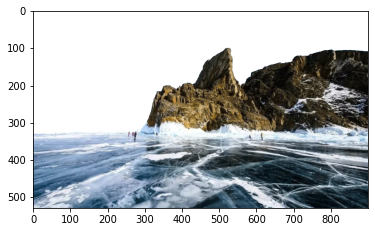

In [83]:
plt.imshow(image)
plt.show()

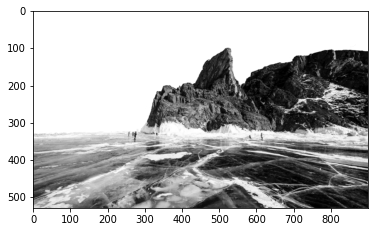

In [84]:
plt.imshow(task_5_vec(image), cmap=plt.get_cmap('gray'))
plt.show()

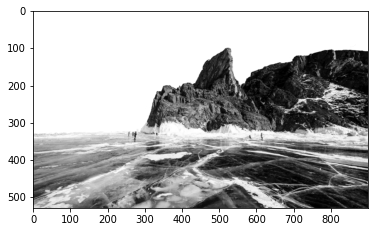

In [85]:
plt.imshow(task_5_cycle(image), cmap=plt.get_cmap('gray'))
plt.show()

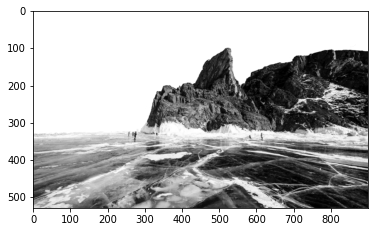

In [86]:
plt.imshow(task_5_my(image), cmap=plt.get_cmap('gray'))
plt.show()

In [87]:
del im_1, im_2, im_3, im_only_for_vec_and_my

**Вывод:** И снова, с заметным преимуществом, выигрывает вариант реализации с векторизацией. Собственный вариант был реализван аналогично векторизованному (но функция *np.dot* была использована от отного аргумента). В собственном варианте (при размерах начальных данных порядка 4) наблюдается небольшое уменьшение скорости работы

### **6. Реализовать кодирование длин серий (Run-length encoding). Дан вектор x. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.**

Начальные данные

In [88]:
x_1 = np.array([2, 2, 2, 3, 3, 3, 5])
x_2 = np.random.randint(0, 20, size = 70)
x_3 = np.random.randint(0, 20, size = 700)
x_only_for_vec_and_my = np.random.randint(0, 20, size = 700000)

6.1. Векторизация

In [89]:
def task_6_vec(x):
  pos = np.append(np.where(x[1:] != x[:-1])[0], np.size(x) - 1)
  mas_count = np.diff(np.append(-1, pos))
  return x[pos], mas_count

In [90]:
%timeit -n 1000 task_6_vec(x_1)

1000 loops, best of 5: 22.1 µs per loop


In [91]:
%timeit -n 1000 task_6_vec(x_2)

1000 loops, best of 5: 18 µs per loop


In [92]:
%timeit -n 1000 task_6_vec(x_3)

1000 loops, best of 5: 21.4 µs per loop


In [93]:
%timeit -n 1000 task_6_vec(x_only_for_vec_and_my)

1000 loops, best of 5: 7.95 ms per loop


6.2. Циклы

In [94]:
def task_6_cycle(x): 
  count_elem = 1
  mas_number = []
  mas_count = []
  for i in range(np.size(x)):
    if i != np.size(x) - 1:
      if x[i] == x[i+1]:
        count_elem += 1
        continue
    mas_number.append(x[i])
    mas_count.append(count_elem)
    count_elem = 1
  return np.array(mas_number), np.array(mas_count)

In [95]:
%timeit -n 1000 task_6_cycle(x_1)

1000 loops, best of 5: 10.8 µs per loop


In [96]:
%timeit -n 1000 task_6_cycle(x_2)

1000 loops, best of 5: 99.5 µs per loop


In [97]:
%timeit -n 1000 task_6_cycle(x_3)

1000 loops, best of 5: 984 µs per loop


6.3. Свой вариант

In [98]:
def task_6_my(x):
  pos = np.hstack((np.where(x[1:] != x[:-1])[0], np.size(x) - 1))
  mas_count = np.diff(np.hstack((-1, pos)))
  return x[pos], mas_count

In [99]:
%timeit -n 1000 task_6_my(x_1)

1000 loops, best of 5: 35.5 µs per loop


In [100]:
%timeit -n 1000 task_6_my(x_2)

1000 loops, best of 5: 54.6 µs per loop


In [101]:
%timeit -n 1000 task_6_my(x_3)

1000 loops, best of 5: 55.4 µs per loop


In [102]:
%timeit -n 1000 task_6_my(x_3)

1000 loops, best of 5: 99.1 µs per loop


Проверка работоспособности

In [103]:
task_6_vec(x_1), task_6_cycle(x_1), task_6_my(x_1)

((array([2, 3, 5]), array([3, 3, 1])),
 (array([2, 3, 5]), array([3, 3, 1])),
 (array([2, 3, 5]), array([3, 3, 1])))

In [104]:
del x_1, x_2, x_3, x_only_for_vec_and_my

**Вывод:** Уже знакомая картина: для маленьких данных (первый порядок) вариант с  циклами показывает лучший результат. При увеличении размера входного массива картина меняется: векторизация в десятки раз быстрее. Собственный вариант был сделан по анологии с вариантом векторизации, но *np.append* был заменен на *np.hstack* (из результатов видно, что при размере массива ~ 6 порядка вариант с *np.hstack* начинаем обгонять вариант с *np.append*).

### 7. Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Сравнить с функцией scipy.spatial.distance.cdist.

In [105]:
x_1 = np.random.randint(0, 20, size = 10)
y_1 = np.random.randint(0, 20, size = 10)
x_2 = np.random.randint(0, 20, size = 100)
y_2 = np.random.randint(0, 20, size = 100)
x_3 = np.random.randint(0, 20, size = 1000)
y_3 = np.random.randint(0, 20, size = 1000)

7.1. Векторизация

In [106]:
def task_7_vec(x, y):
  XY = np.vstack((x, y)).T
  return np.linalg.norm(XY[:, np.newaxis, :] - XY[np.newaxis, :, :], axis = -1)

In [107]:
%timeit -n 100 task_7_vec(x_1, y_1)

The slowest run took 9.25 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 50.9 µs per loop


In [108]:
%timeit -n 100 task_7_vec(x_2, y_2)

100 loops, best of 5: 357 µs per loop


In [109]:
%timeit -n 100 task_7_vec(x_3, y_3)

100 loops, best of 5: 20 ms per loop


7.2. Циклы

In [110]:
def task_7_cycle(x, y):
  XY = np.vstack((x, y)).T
  res = np.zeros((len(XY), len(XY)))
  for i in range(len(XY)):
    for j in range(len(XY)):
      res[i][j] = np.sqrt((XY[i][0] - XY[j][0])**2+(XY[i][1] - XY[j][1])**2)
  return res

In [111]:
%timeit -n 100 task_7_cycle(x_1, y_1)

100 loops, best of 5: 339 µs per loop


In [112]:
%timeit -n 10 task_7_cycle(x_2, y_2)

10 loops, best of 5: 32.8 ms per loop


In [113]:
%timeit -n 1 task_7_cycle(x_3, y_3)

1 loop, best of 5: 3.35 s per loop


7.3. Свой вариант

In [114]:
def task_7_my(x, y):
  XY = np.vstack((x, y)).T
  return np.sqrt(np.sum((XY[:, np.newaxis, :] - XY[np.newaxis, :, :])**2, axis = -1))

In [115]:
%timeit -n 100 task_7_my(x_1, y_1)

100 loops, best of 5: 37.2 µs per loop


In [116]:
%timeit -n 100 task_7_my(x_2, y_2)

100 loops, best of 5: 96.4 µs per loop


In [117]:
%timeit -n 100 task_7_my(x_3, y_3)

100 loops, best of 5: 16.1 ms per loop


Проверка работоспособности

In [118]:
XY = np.vstack((x_1, y_1)).T
print(distance.cdist(XY, XY, 'euclidean'))
(task_7_vec(x_1, y_1) == task_7_cycle(x_1, y_1)).all() and (distance.cdist(XY, XY, 'euclidean') == task_7_vec(x_1, y_1)).all()

[[ 0.         15.23154621  8.94427191  2.23606798 14.31782106 11.66190379
  14.31782106  6.32455532 19.6468827  13.        ]
 [15.23154621  0.          6.32455532 13.         12.04159458 12.64911064
  20.61552813 11.3137085  12.08304597  2.23606798]
 [ 8.94427191  6.32455532  0.          6.70820393 11.18033989 10.19803903
  17.11724277  6.32455532 14.2126704   4.12310563]
 [ 2.23606798 13.          6.70820393  0.         13.03840481 10.63014581
  14.56021978  5.         18.02775638 10.77032961]
 [14.31782106 12.04159458 11.18033989 13.03840481  0.          3.
   9.89949494  8.06225775  6.08276253 11.04536102]
 [11.66190379 12.64911064 10.19803903 10.63014581  3.          0.
   8.06225775  5.65685425  9.05538514 11.18033989]
 [14.31782106 20.61552813 17.11724277 14.56021978  9.89949494  8.06225775
   0.         11.         15.26433752 18.97366596]
 [ 6.32455532 11.3137085   6.32455532  5.          8.06225775  5.65685425
  11.          0.         13.34166406  9.21954446]
 [19.6468827  12

True

In [119]:
del x_1, x_2, x_3, y_1, y_2, y_3

**Вывод:** Использование циклов очень сильно снижет скорость выполнение программы (при достаточно больших данных - в сотни и тысячи раз). Любая современная задача будет (с небольшим, по своременным меркам, размером данных) будет считаться очень долго (если вообще посчитается), при использовании циклов. Для адекватной работы программы, необходимо (где это возможно) использовать векторизованные реализации.